# 1. KNN Classification with Scikit-Learn:

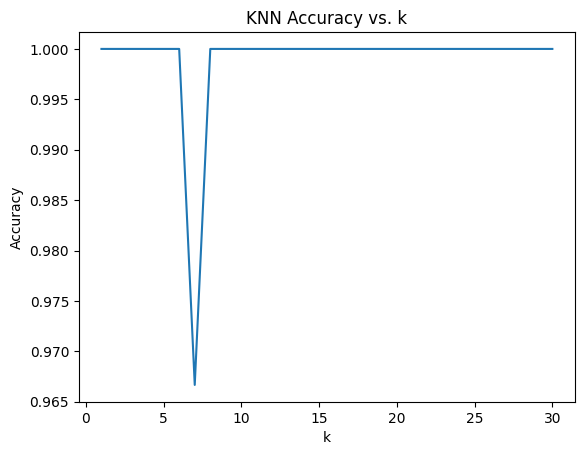

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with different values of k
k_values = range(1, 31)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracy vs. k graph
import matplotlib.pyplot as plt

plt.plot(k_values, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. k")
plt.show()

# 2. Custom KNN Implementation with Different Distance Metrics:

In [ ]:
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def minkowski_distance(x1, x2, p):
    return np.power(np.sum(np.power(np.abs(x1 - x2), p)), 1 / p)

def chebyshev_distance(x1, x2):
    return np.max(np.abs(x1 - x2))

class CustomKNN:
    def __init__(self, n_neighbors=5, distance_metric="euclidean"):
        self.n_neighbors = n_neighbors
        self.distance_metric = distance_metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for x_test in X_test:
            distances = []
            for i in range(len(self.X_train)):
                if self.distance_metric == "euclidean":
                    distance = euclidean_distance(x_test, self.X_train[i])
                elif self.distance_metric == "manhattan":
                    distance = manhattan_distance(x_test, self.X_train[i])
                elif self.distance_metric == "minkowski":
                    distance = minkowski_distance(x_test, self.X_train[i], p=3)
                elif self.distance_metric == "chebyshev":
                    distance = chebyshev_distance(x_test, self.X_train[i])
                distances.append((distance, i))
            distances.sort()
            neighbors = [self.y_train[i] for _, i in distances[:self.n_neighbors]]
            y_pred.append(max(set(neighbors), key=list(neighbors).count))
        return y_pred

# Use the custom KNN implementation with different distance metrics
knn_euclidean = CustomKNN(5, distance_metric="euclidean")
knn_manhattan = CustomKNN(5, distance_metric="manhattan")
knn_chebyshev = CustomKNN(5, distance_metric="chebyshev")
knn_minkowski = CustomKNN(5, distance_metric="minkowski")

# Train and evaluate the models
knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)
knn_chebyshev.fit(X_train, y_train)
knn_minkowski.fit(X_train, y_train)

y_pred_euclidean = knn_euclidean.predict(X_test)
y_pred_manhattan = knn_manhattan.predict(X_test)
y_pred_chebyshev = knn_chebyshev.predict(X_test)
y_pred_minkowski = knn_minkowski.predict(X_test)

accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
accuracy_chebyshev = accuracy_score(y_test, y_pred_chebyshev)
accuracy_minkowski = accuracy_score(y_test, y_pred_minkowski)

print("Accuracy (Euclidean):", accuracy_euclidean)
print("Accuracy (Manhattan):", accuracy_manhattan)
print("Accuracy (Chebyshev):", accuracy_chebyshev)
print("Accuracy (Minkowski):", accuracy_minkowski)

Accuracy (Euclidean): 1.0
Accuracy (Manhattan): 1.0
Accuracy (Chebyshev): 1.0
Accuracy (Minkowski): 0.9666666666666667


# 3. Applying Custom KNN to Pima Indians Diabetes Database:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("diabetes.csv")

# Handle missing values (if necessary)
# data = data.fillna(data.mean())

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(data.drop("Outcome", axis=1))
y = data["Outcome"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# Create a KNN classifier with optimized parameters
knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')  # Use ball tree for efficiency
knn.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7792207792207793
